<a href="https://colab.research.google.com/github/TamiraTeles/ELO/blob/master/C%C3%B3pia_de_Dados_Airbnb_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

## Análise dos dados do Airbnb -Tókio

O [Airbnb](htpps://www.airbnb.com.br/) é uma comunidade de viagens que conecta pessoas que possuem imóveis para locação temporária, os **anfitriões**, com pessoas interessadas na hospedagem, os **viajantes**. A plataforma facilita essa forma alternativa de hospedagem possibilitando conexão e prestando suporte para ambas as partes.
Por meio do portal [inside Airbnb](http://insideairbnb.com/get-the-data.html), a Airbnb disponibiliza dados das principais cidades do mundo, possibilitando baixar uma grande quantidade de dados e desenvolver projetos de *Data Science*

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste notebook iremos analisar dados de hospedagem na cidade de Tókio e ver quais insights podem ser extraídos a partir de dados brutos.**



**Obtenção de Dados**

Todos os dados foram obtidos através do portal [inside Airbnb](http://insideairbnb.com/get-the-data.html)


In [1]:
import pandas as pd
import matplotlib.pyplot as ptl
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-06-11/visualisations/listings.csv")

##Análise dos Dados

**discionário de variáveis**




*   Id = numero de id referente ao imóvel
*   Name = nome da propriedade anunciada

*   host_id = numero referente ao propietário (anfitrião)
*   host_name = Nome do anfitrião


*   neighbourhood_group = nome do bairro
*   room_type = tipo de acomodação

*   price = preço para alugar o imóvel
*   minimum_nights = quantidade minima de noites

*   number_of_reviews = número de reviews que a propriedade possue
*   last_review = ultimo review

*   review_per_month = número de review por mês
*   calculated_host_listings_count = número de propriedades do mesmo anfitrião

*   availability_365 = número de dias disponíves nos 365 dias do ano
*   Item da lista





















In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.06,1,365
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.21,1,365
2,4890,Quiet Historic & Cute +Free Cruise,6792,Jennifer Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,100,4,22,2017-04-30,0.21,1,55
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,115,1,221,2020-05-26,1.66,1,90
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,119,10,268,2020-02-26,2.39,2,288


### Q1- Quantos atributos (variáveis) e quantas entradas nosso conjunto de dados possui? Quais os tipos de variáveis?**

In [4]:
print("entradas:\t{}".format(df.shape[0]))
print("variaveis:\t{}\n".format(df.shape[1]))

display(df.dtypes)

entradas:	67235
variaveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2- Qual a porcentagem de Valores ausentes no *dataset*?**

In [5]:
#ordenar em ordem decrescente as variáveias por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.216509
last_review                       0.216509
name                              0.000982
host_name                         0.000223
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

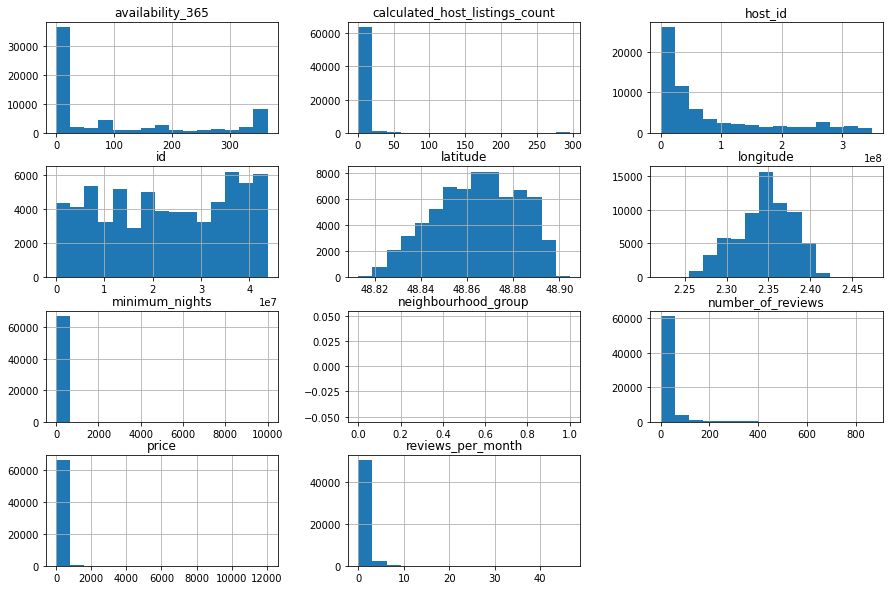

In [6]:
#plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

###**Q4.Qual a média do preço de aluguel?**

É possivel identificar a presença de outliers nas variáveis: price, minimum_nights calculates_host_listings_counts

In [7]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,67235.000000,67235.000000,67235.000000,52678.000000,67235.000000,67235.000000
mean,133.334603,5.542932,20.010441,0.843189,8.429018,99.006455
std,366.435219,43.642359,41.660848,1.101604,34.717336,133.740168
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,1.000000,1.000000,0.180000,1.000000,0.000000
50%,85.000000,2.000000,6.000000,0.470000,1.000000,2.000000
75%,125.000000,4.000000,20.000000,1.080000,1.000000,179.000000
max,12039.000000,9999.000000,867.000000,46.530000,296.000000,365.000000


Pela tabela acima, visualizando a coluna 'price' a média da diária é **133,33** Euros. Se considerarmos, no entanto as distorções causadas pelos valores extremos, ou seja, valores abaixo dos 25% e acima dos 75%, podemos estimar uma diária média mais próxima de **90,00** Euros.

In [8]:
df_clean = df.copy()

###**Q5. Qual a correlação existente entre as variáveis?**


In [9]:
corr = df_clean[['price','number_of_reviews','reviews_per_month','minimum_nights','calculated_host_listings_count','minimum_nights']].corr()
display(corr)

,price,number_of_reviews,reviews_per_month,minimum_nights,calculated_host_listings_count,minimum_nights
price,1.000000,-0.016103,0.020354,-0.000887,0.062026,-0.000887
number_of_reviews,-0.016103,1.000000,0.726327,-0.012242,-0.045699,-0.012242
reviews_per_month,0.020354,0.726327,1.000000,-0.023014,-0.005903,-0.023014
minimum_nights,-0.000887,-0.012242,-0.023014,1.000000,0.055079,1.000000
calculated_host_listings_count,0.062026,-0.045699,-0.005903,0.055079,1.000000,0.055079
minimum_nights,-0.000887,-0.012242,-0.023014,1.000000,0.055079,1.000000


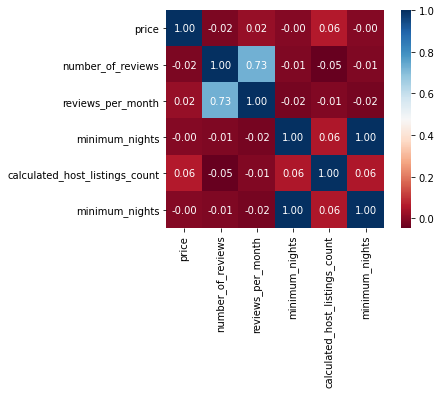

In [10]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square= True, linecolor='white', annot= True);

###**Q5. Qual o tipo de imovel mais alugado no Airbnb?**

In [11]:
#mostrar a quantidade de cada tipo de imovel disponível
df_clean.room_type.value_counts()

Entire home/apt    58184
Private room        7204
Hotel room          1413
Shared room          434
Name: room_type, dtype: int64

In [12]:
#mostrar a porcentagem de cada tipo de imovel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.865383
Private room       0.107147
Hotel room         0.021016
Shared room        0.006455
Name: room_type, dtype: float64

###**Q6. Qual a localidade mais cara de Paris?**

In [13]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending= False)[:10]

neighbourhood
Élysée            262.870652
Palais-Bourbon    207.554204
Louvre            187.764706
Passy             187.670346
Opéra             181.335835
Luxembourg        178.914059
Hôtel-de-Ville    176.172904
Temple            169.568175
Bourse            162.846055
Panthéon          146.038428
Name: price, dtype: float64

In [15]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

NameError: ignored

###**Q7.Qual é a média do minimo de noites para aluguel?**

In [ ]:
df[['minimum_nights']].describe()

Eliminando do cálculo a distorção causada pelo máximo de número minimo de pernoites incompatívelo com a realidade, realizo uma média aritimética simples entre os valores correspondente ao número de noites disponibilizadas por até 25% e at´pe 75% dos anfitriões a média estimada é de 2,5 noites. 

###**Conclusão**
Trata-se de uma análise realizada como exercício de aprendizado sobre a cidade de Paris.
Observamos algumas distorções com relação a preço de aluguel, numero minimo de noites, disponibilidade. No entanto é possível através de uma avaliação mais apurada, mesmo que superficial tirar algumas conclusões com relação a média de valores de aluguel por noite, minimo de noites para aluguel entre outros. E com conhecimento mais apurado e aprofundado sobre análise de dados é possível eliminar essas distorções.